
# Fake Website Detection using Machine Learning

## Step 1: Data Preprocessing

### 1. Import Dataset

In [539]:
import pandas as pd

In [540]:
data = pd.read_csv('./combined_dataset.csv')

### About Dataset

* Domain: The URL itself.
* Ranking: Page Ranking
* isIp: Is there an IP address in the weblink
* valid: This data is fetched from google's whois API that tells us more about the current
    status of the URL's registration.
* activeDuration: Also from whois API. Gives the duration of the time since the
    registration up until now.
* urlLen: It is simply the length of the URL
* is@: If the link has a '@' character then it's value = 1
* isredirect: If the link has double dashes, there is a chance that it is a redirect. 1->    multiple
dashes present together.
* haveDash: If there are any dashes in the domain name.
* domainLen: The length of just the domain name.
* noOfSubdomain: The number of subdomains preset in the URL.
* Labels: 0 -> Legitimate website , 1 -> Phishing Link/ Spam Link

In [541]:
# List all columns
columns = data.columns
print(columns)

Index(['domain', 'ranking', 'isIp', 'valid', 'activeDuration', 'urlLen', 'is@',
       'isredirect', 'haveDash', 'domainLen', 'nosOfSubdomain', 'label'],
      dtype='object')


In [542]:
data.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [543]:
data.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,9.591000e+04,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000
mean,6.118618e+06,0.000229,0.573892,3747.876144,69.327442,0.002773,0.007444,0.157856,23.409061,2.387718,0.582984
std,4.835254e+06,0.015144,0.494512,3974.587188,69.740134,0.052591,0.085960,0.364608,25.426852,2.140997,0.493068
min,1.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3.205600e+04,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,14.000000,2.000000,0.000000
50%,1.000000e+07,0.000000,1.000000,2192.000000,44.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000
75%,1.000000e+07,0.000000,1.000000,7670.000000,78.000000,0.000000,0.000000,0.000000,22.000000,2.000000,1.000000
max,1.000000e+07,1.000000,1.000000,15707.000000,2175.000000,1.000000,1.000000,1.000000,244.000000,34.000000,1.000000


### 2. Handle Missing Values

In [544]:
print(data.isnull().sum())

domain            0
ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64


Handling null values is not required as no null values are present in the dataset

### 3. Encode the categorical data

In [545]:
categorical_columns = ['isIp', 'valid', 'is@', 'isredirect', 'haveDash','label']

# loop through categorical columns and print unique values with column name
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f'{column}: {unique_values}')


isIp: [0 1]
valid: [0 1]
is@: [0 1]
isredirect: [0 1]
haveDash: [1 0]
label: [1 0]


Encoding is not required as categoriacal data is already encoded

## Step 2: Feature Engineering

### 1. Feature Scaling

In [546]:
from sklearn.preprocessing import MinMaxScaler

scales_column = ['ranking', 'activeDuration', 'urlLen', 'domainLen', 'nosOfSubdomain']

# loop through scales_column and apply MinMaxScaler to it

for column in scales_column:
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(data[[column]])

# # Separate the feature to be scaled and the target variable
# X = data[['ranking']]
# y = data['label']

# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Fit the scaler to the training data
# scaler.fit(X)

# # Transform the feature using the fitted scaler
# X_scaled = scaler.transform(X)

# # Combine the scaled feature with the target variable
# X_scaled = pd.DataFrame(X_scaled, columns=['ranking'])
# data_scaled = pd.concat([X_scaled, y], axis=1)

print(data.head())

                                              domain   ranking  isIp  valid  \
0                               www.voting-yahoo.com  1.000000     0      0   
1         www.zvon.org/xxl/WSDL1.1/Output/index.html  0.019491     0      1   
2  tecportais.com/file-security-update-infonfmati...  1.000000     0      0   
3                bima.astro.umd.edu/nemo/linuxastro/  0.000700     0      0   
4  huarui-tec.com/js/?us.battle.net/login/en/?ref...  1.000000     0      1   

   activeDuration    urlLen  is@  isredirect  haveDash  domainLen  \
0        0.000000  0.005078    0           0         1   0.070539   
1        0.465079  0.015235    0           0         0   0.037344   
2        0.000000  0.067405    0           0         0   0.045643   
3        0.000000  0.012004    0           0         0   0.062241   
4        0.046476  0.032318    0           0         1   0.045643   

   nosOfSubdomain  label  
0        0.058824      1  
1        0.058824      0  
2        0.029412      1  
3 

### 1. Feature Selection

In [547]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
# Separate the features and the target variable
X = data[['ranking', 'isIp', 'valid', 'activeDuration', 'urlLen', 'is@', 'isredirect', 'haveDash', 'domainLen', 'nosOfSubdomain']]
y = data['label']

# Create a SelectKBest object using chi2 as the scoring function
selector = SelectKBest(chi2, k=2)

# Fit the selector to the training data
selector.fit(X, y)

# Get the selected features
selected_features = selector.get_support()

# Print the selected features
print(selected_features)

[ True False False  True False False False False False False]


Feature selection is returning false values for most of the columns. So, we are not using feature selection, will decide the features to be used based on the accuracy of the model.

In [548]:
X= data.drop(['label', 'domain'], axis=1)
Y= data.label

In [549]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.40)
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 57546 samples.
Testing set has 38364 samples.


## Step 3: Model Training:

### Logistic Regression

In [550]:
from sklearn.linear_model import LogisticRegression  # For Logistic Regression
#create logistic regression object
LogReg=LogisticRegression()

#Train the model using training data 
LogReg.fit(x_train,y_train)


#Test the model using testing data
y_pred = LogReg.predict(x_test)

f1 score is  0.8814234820711178
matthews correlation coefficient is  0.7559492251126607
The accuracy Logistic Regression on testing data is:  88.1738087790637


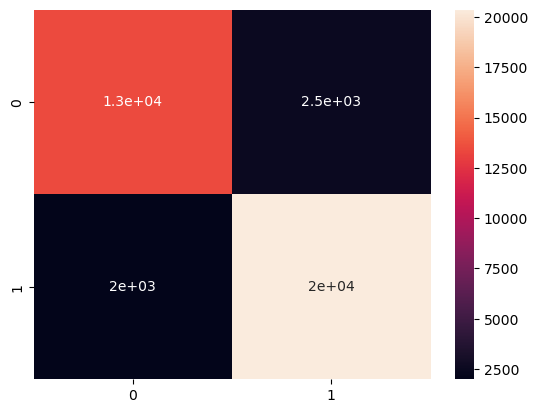

In [551]:
from sklearn.metrics import confusion_matrix, f1_score, matthews_corrcoef, accuracy_score
import seaborn as sns

LogReg1=LogisticRegression(random_state= 0, multi_class='multinomial' , solver='newton-cg')
#Train the model using training data 
LogReg1.fit(x_train,y_train)


#Test the model using testing data
y_pred_log = LogReg1.predict(x_test)

cm=confusion_matrix(y_test,y_pred_log)
sns.heatmap(cm,annot=True)
print("f1 score is ",f1_score(y_test,y_pred_log,average='weighted'))
print("matthews correlation coefficient is ",matthews_corrcoef(y_test,y_pred_log))
print("The accuracy Logistic Regression on testing data is: ",100.0 *accuracy_score(y_test,y_pred_log))

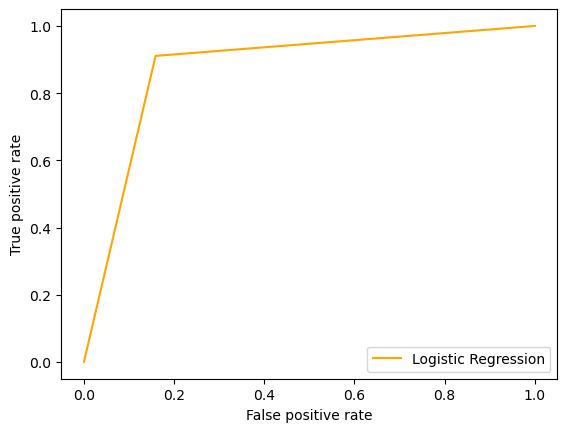

In [552]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr,tpr,thresh = roc_curve(y_test,y_pred_log)
roc_auc = accuracy_score(y_test,y_pred_log)

# Plot ROC curve for Logistic Regression
plt.plot(fpr,tpr,'orange',label = 'Logistic Regression')
plt.legend("Logistic Regression", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

### Random Forest Classifier

f1 score is  0.9529762037955362
matthews correlation coefficient is  0.9032692211962371
The accuracy Random forest classifier on testing data is:  95.30028151391929


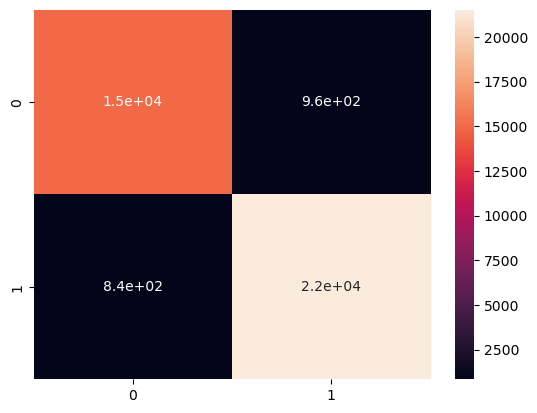

In [553]:
from sklearn.ensemble import RandomForestClassifier
#create RFC object
RFClass = RandomForestClassifier()
#Train the model using training data 
RFClass.fit(x_train,y_train)

#Test the model using testing data
y_pred_rfc = RFClass.predict(x_test)

cm=confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm,annot=True)
print("f1 score is ",f1_score(y_test,y_pred_rfc,average='weighted'))
print("matthews correlation coefficient is ",matthews_corrcoef(y_test,y_pred_rfc))
print("The accuracy Random forest classifier on testing data is: ",100.0 *accuracy_score(y_test,y_pred_rfc))

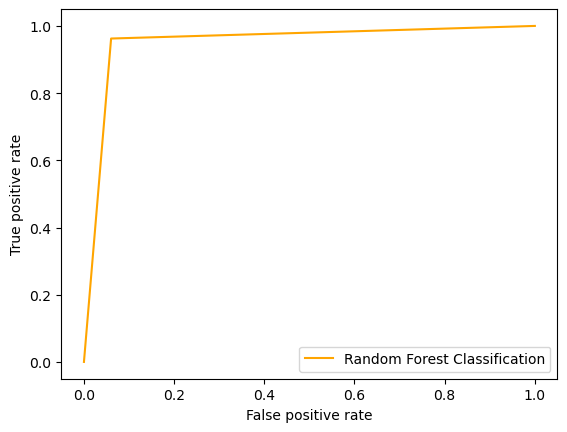

In [554]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_rfc)
roc_auc = accuracy_score(y_test,y_pred_rfc)

# Plot ROC curve for Logistic Regression
plt.plot(fpr,tpr,'orange',label = 'Random Forest Classification')
plt.legend("Logistic Regression", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

### SVM

f1 score is  0.8906432302261283
matthews correlation coefficient is  0.7754663333002119
The accuracy SVC on testing data is:  89.05223647169221


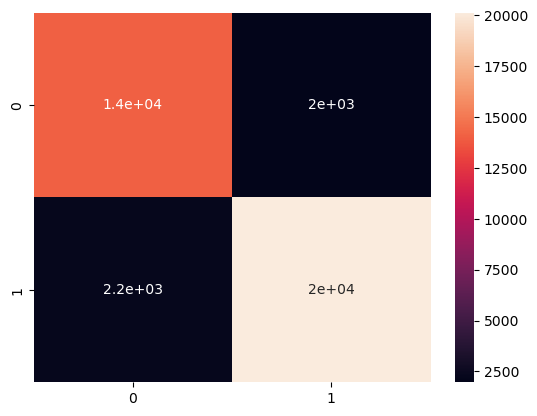

In [555]:
from sklearn.svm import SVC
#create SVM object

svc = SVC()

svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)

cm=confusion_matrix(y_test,y_pred_svc)
sns.heatmap(cm,annot=True)
print("f1 score is ",f1_score(y_test,y_pred_svc,average='weighted'))
print("matthews correlation coefficient is ",matthews_corrcoef(y_test,y_pred_svc))
print("The accuracy SVC on testing data is: ",100.0 *accuracy_score(y_test,y_pred_svc))

In [556]:
print("The accuracy Logistic Regression on testing data is: ",100.0 *accuracy_score(y_test,y_pred_log))
print("The accuracy Random forest classifier on testing data is: ",100.0 *accuracy_score(y_test,y_pred_rfc))
print("The accuracy SVC on testing data is: ",100.0 *accuracy_score(y_test,y_pred_svc))

The accuracy Logistic Regression on testing data is:  88.1738087790637
The accuracy Random forest classifier on testing data is:  95.30028151391929
The accuracy SVC on testing data is:  89.05223647169221


Since the Random Forest Classifier is giving the best accuracy, we will use it for the prediction.

Now we will Evaluate the performance of the Random Forest classifier on different datasets

In [558]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()

# Split the data into training and testing sets
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the Random Forest classifier on the Iris dataset is:", accuracy)

The accuracy of the Random Forest classifier on the Iris dataset is: 1.0


In [560]:
import pickle 

pickle.dump(clf, open('random_forest_classifier.pkl', 'wb'))